In [5]:
import pandas as pd
import numpy as np                # for math calculations 
import seaborn as sns             #for data visualization 
import matplotlib.pyplot as plt   #for data ploting graphs 
%matplotlib inline
import warnings                   #ignore warnings
warnings.filterwarnings("ignore")

In [10]:

train=pd.read_csv("train_ctrUa4K.csv")
test=pd.read_csv("test_lAUu6dG.csv")

In [11]:
train_original=train.copy()
test_original=test.copy()

In [29]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [30]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [31]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [32]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [34]:
train.shape

(614, 13)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [18]:
test.shape

(367, 12)

In [22]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [24]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

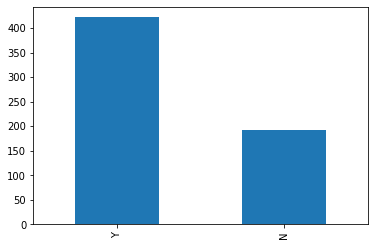

In [25]:
train['Loan_Status'].value_counts().plot.bar()

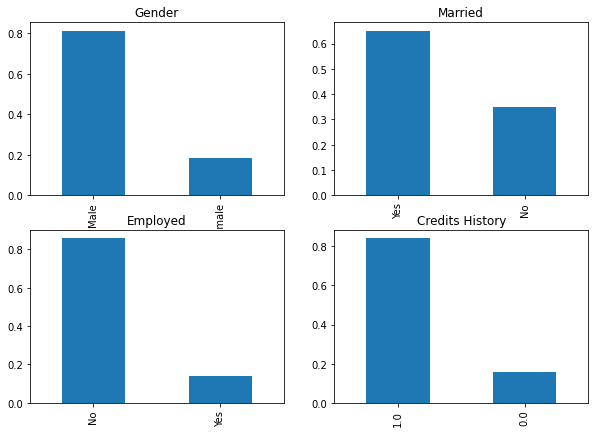

In [33]:
fig,axes=plt.subplots(2,2, figsize=(10,7))
train.Gender.value_counts(normalize=True).plot.bar(title='Gender', ax=axes[0,0])
train.Married.value_counts(normalize=True).plot.bar(title='Married', ax=axes[0,1])
train.Self_Employed.value_counts(normalize=True).plot.bar(title='Employed',ax=axes[1,0])
train.Credit_History.value_counts(normalize=True).plot.bar(title='Credits History',ax=axes[1,1])
plt.show()

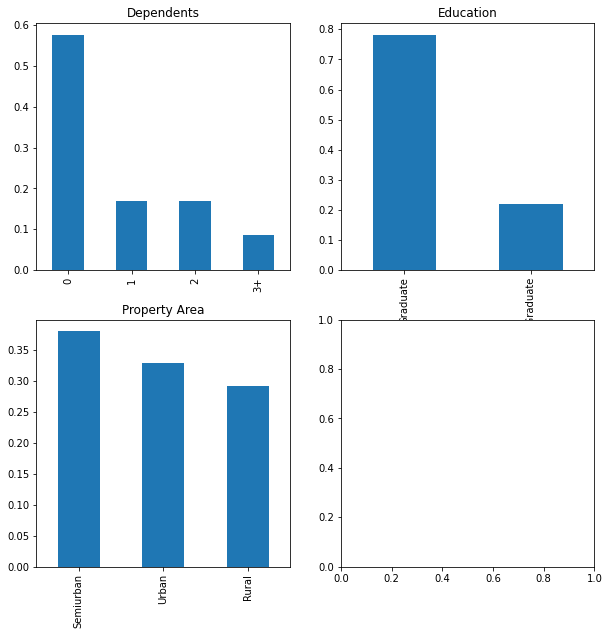

In [37]:
fig,axis=plt.subplots(2,2,figsize=(10,10))
train.Dependents.value_counts(normalize=True).plot.bar(title='Dependents',ax=axis[0,0])
train.Education.value_counts(normalize=True).plot.bar(title='Education',ax=axis[0,1])
train.Property_Area.value_counts(normalize=True).plot.bar(title='Property Area',ax=axis[1,0])

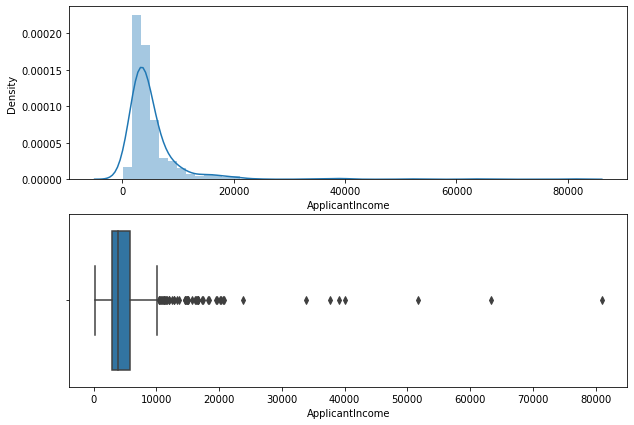

In [38]:
fig,axes=plt.subplots(2,figsize=(10,7))
sns.distplot(train.ApplicantIncome,ax=axes[0])
sns.boxplot(train.ApplicantIncome,ax=axes[1])

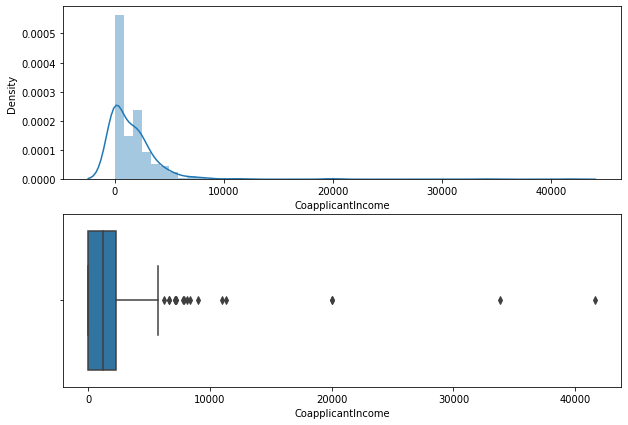

In [39]:
fig,axes=plt.subplots(2,figsize=(10,7))
sns.distplot(train.CoapplicantIncome,ax=axes[0])
sns.boxplot(train.CoapplicantIncome,ax=axes[1])

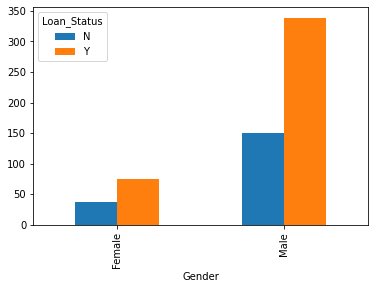

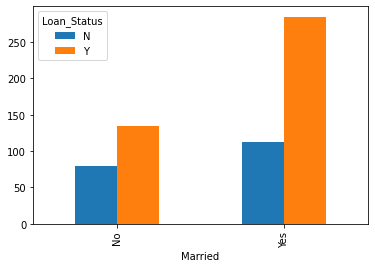

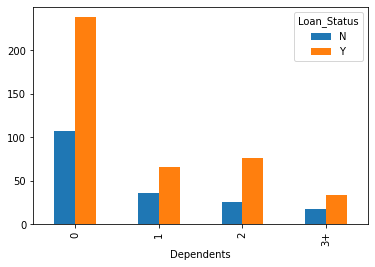

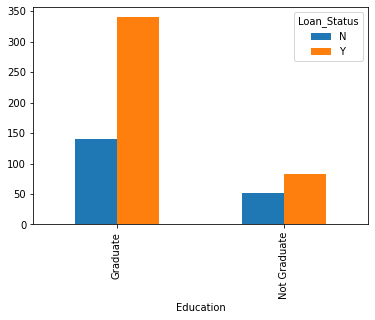

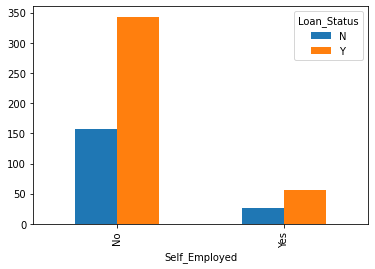

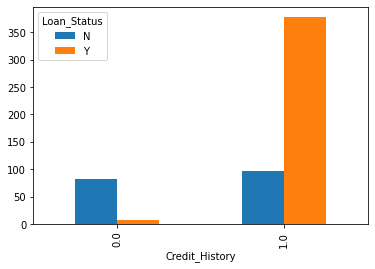

In [40]:
pd.crosstab(train.Gender,train.Loan_Status).plot(kind='bar')
pd.crosstab(train.Married,train.Loan_Status).plot(kind='bar')
pd.crosstab(train.Dependents,train.Loan_Status).plot(kind='bar')
pd.crosstab(train.Education,train.Loan_Status).plot(kind='bar')
pd.crosstab(train.Self_Employed,train.Loan_Status).plot(kind='bar')
pd.crosstab(train.Credit_History,train.Loan_Status).plot(kind='bar')

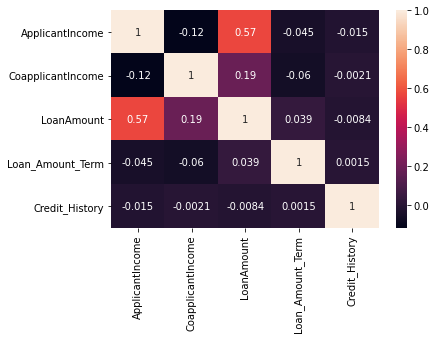

In [41]:
sns.heatmap(data=train.corr(),annot=True)

In [42]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
train.Gender.fillna(train.Gender.mode()[0],inplace=True)
train.Married.fillna(train.Married.mode()[0],inplace=True)
train.Dependents.fillna(train.Dependents.mode()[0],inplace=True)
train.Self_Employed.fillna(train.Self_Employed.mode()[0],inplace=True)
train.Credit_History.fillna(train.Credit_History.mode()[0],inplace=True)

In [45]:
train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [46]:
train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mode()[0],inplace=True)

In [47]:
train.LoanAmount.fillna(train.LoanAmount.median(),inplace=True)

In [48]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [49]:
test.Gender.fillna(test.Gender.mode()[0],inplace=True)
test.Dependents.fillna(test.Dependents.mode()[0],inplace=True)
test.Self_Employed.fillna(test.Self_Employed.mode()[0],inplace=True)
test.Credit_History.fillna(test.Credit_History.mode()[0],inplace=True)
test.Loan_Amount_Term.fillna(test.Loan_Amount_Term.mode()[0],inplace=True)
test.LoanAmount.fillna(test.LoanAmount.median(),inplace=True)

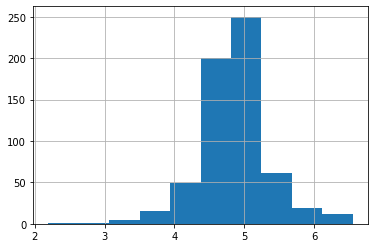

In [50]:
train.LoanAmount_log =np.log(train.LoanAmount)
train.LoanAmount_log.hist()
test.LoanAmount_log=np.log(test.LoanAmount)

In [51]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [52]:
x=train.drop(columns=['Loan_Status','Loan_ID'],axis=1)
y=train.Loan_Status
test=test.drop(columns='Loan_ID',axis=1)
xdum =pd.get_dummies(x)

In [53]:
testdum =pd.get_dummies(test)

In [54]:
testdum.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xdum,y,test_size=.3)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log =LogisticRegression()
log.fit(x_train,y_train)
pred =log.predict(x_test)

In [57]:
accuracy_score(y_test,pred)

0.8108108108108109

In [58]:
final = log.predict(testdum)

In [60]:
submit=test_original.Loan_ID

In [61]:
submit=pd.DataFrame(submit)

In [64]:
final =pd.DataFrame(final)
submit =pd.concat([submit,final],axis=1)
submit.rename(columns={0:'Loan_Status'},inplace=True)
submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Loan_ID      367 non-null    object
 1   Loan_Status  367 non-null    object
dtypes: object(2)
memory usage: 5.9+ KB


In [66]:
submit.to_csv('submissn.csv',index=False)